In [1]:
library("readxl")
library("dplyr")
library(ggplot2)
install.packages("corrplot")
library(corrplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [2]:
real_estate <- read_excel("Real estate valuation data set.xlsx")
head(real_estate)

No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


In [3]:
real_estate <- real_estate %>%
        rename(
            transaction_date = `X1 transaction date`,
            house_age = `X2 house age`,
            nearest_station = `X3 distance to the nearest MRT station`,
            num_convenience = `X4 number of convenience stores`,
            lat = `X5 latitude`,
            lon = `X6 longitude`,
            house_price = `Y house price of unit area`
        )
head(real_estate)

No,transaction_date,house_age,nearest_station,num_convenience,lat,lon,house_price
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


#### Summary of key features:

In [4]:
summary(real_estate$house_age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   9.025  16.100  17.713  28.150  43.800 

The mean of house age is 17.713 years, with a minimum of 0 years and a maximum of 43.8 years.

In [5]:
summary(real_estate$nearest_station)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.38  289.32  492.23 1083.89 1454.28 6488.02 

The mean of distance to the nearest MRT station is 1083.89 meters, with a minimum of 23.38 meters and a maximum of 6488.02 meters.

In [6]:
summary(real_estate$num_convenience)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   4.000   4.094   6.000  10.000 

The mean of the number of convenience stores in the living circle on foot is roughly 4, with a minimum of 0 and a maximum of 10.

In [7]:
summary(real_estate$house_price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.60   27.70   38.45   37.98   46.60  117.50 

The mean of house price is 37.98 (10000 New Taiwan Dollar/Ping), with a minimum of 7.6 (10000 New Taiwan Dollar/Ping) and a maximum of 117.5 (10000 New Taiwan Dollar/Ping).

#### Visualizations of the data:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


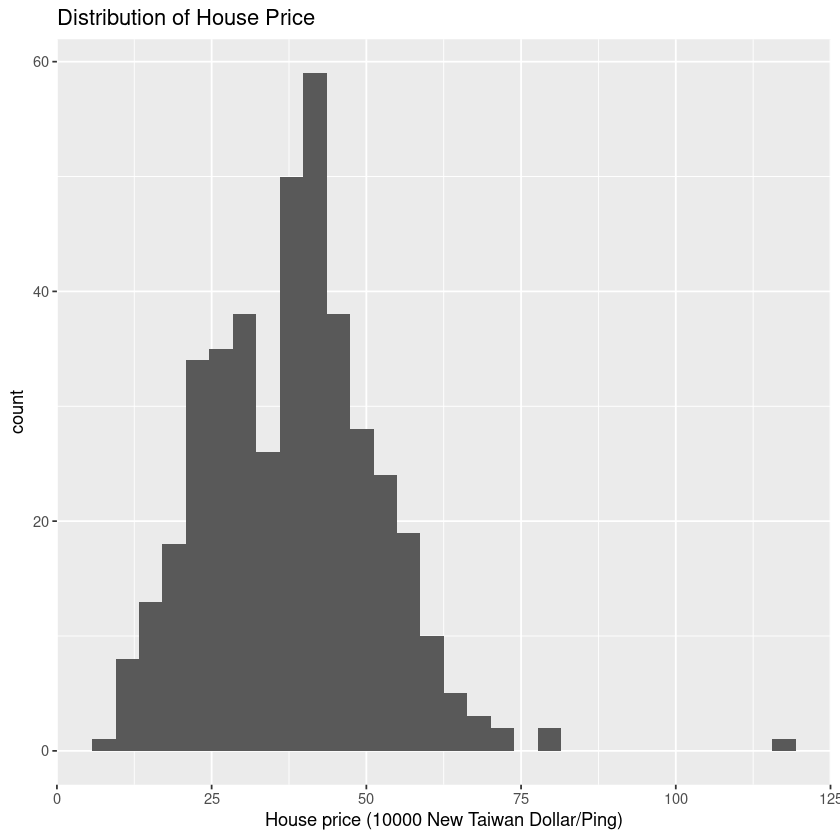

In [8]:
# Visualize the distribution of house price (response variable)
ggplot(real_estate, aes(x = house_price)) +
    geom_histogram() +
    xlab("House price (10000 New Taiwan Dollar/Ping)") +
    ggtitle("Distribution of House Price")

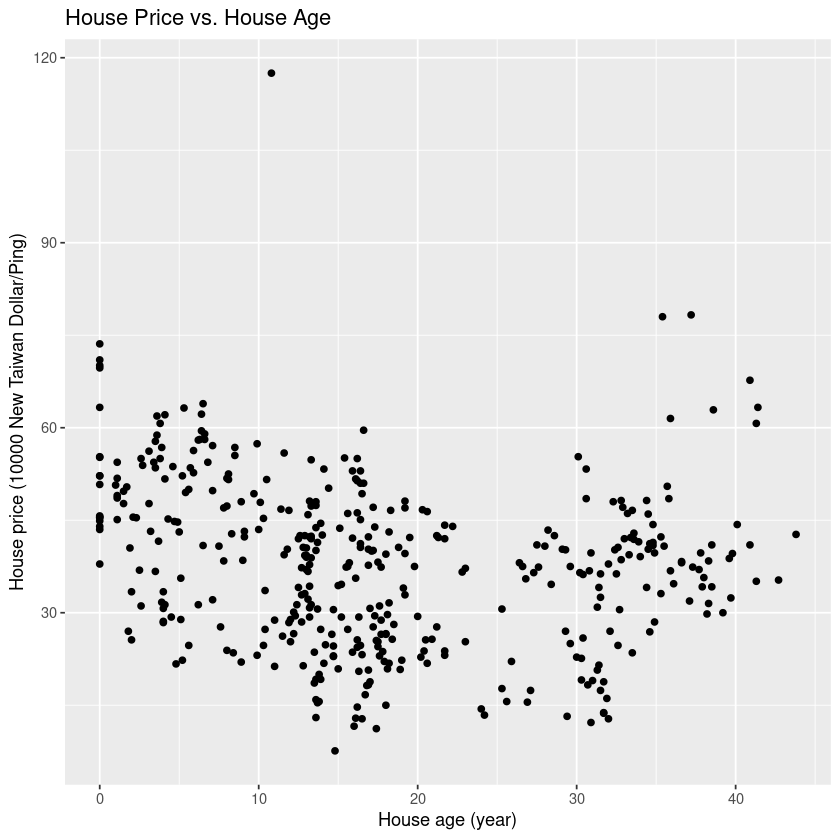

In [9]:
# Visualize the relationship between house age and house price
ggplot(real_estate, aes(x = house_age, y = house_price)) +
    geom_point() +
    labs(x = "House age (year)", y = "House price (10000 New Taiwan Dollar/Ping)") +
    ggtitle("House Price vs. House Age")

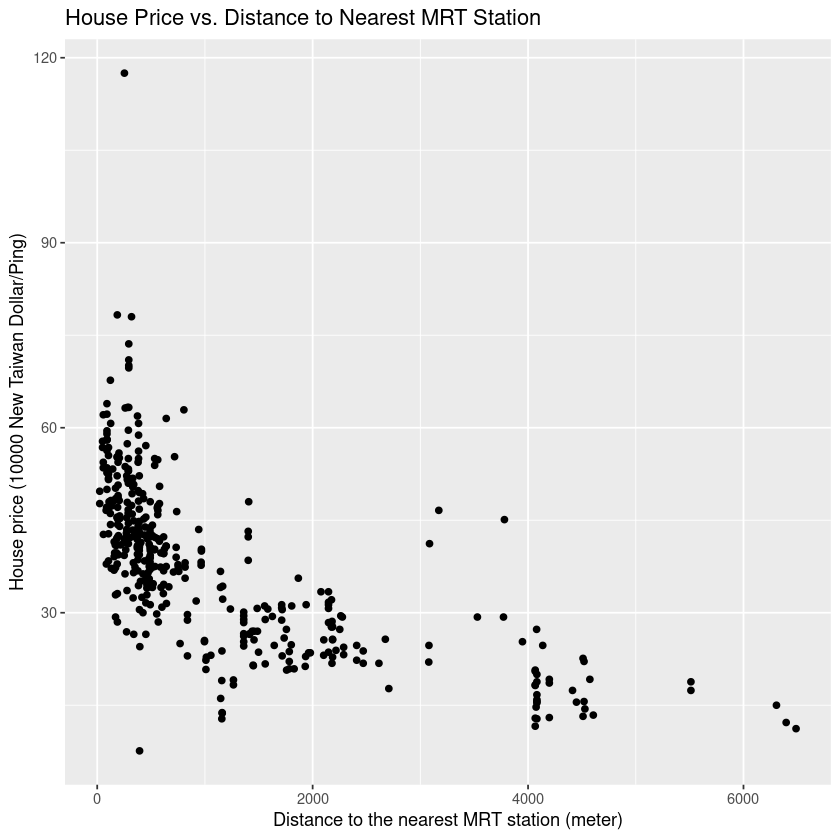

In [10]:
# Visualize the relationship between distance to nearest MRT station and house price
ggplot(real_estate, aes(x = nearest_station, y = house_price)) +
    geom_point() +
    labs(x = "Distance to the nearest MRT station (meter)", y = "House price (10000 New Taiwan Dollar/Ping)") +
    ggtitle("House Price vs. Distance to Nearest MRT Station")

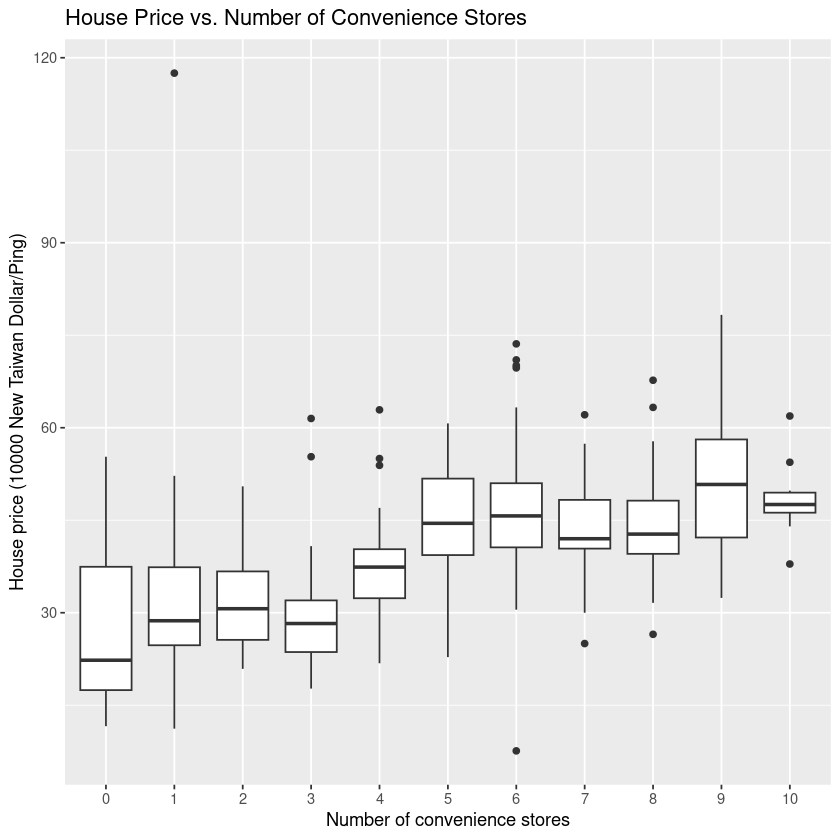

In [11]:
# Visualize the relationship between number of convenience stores and house price
ggplot(real_estate, aes(x = as.factor(num_convenience), y = house_price)) +
    geom_boxplot() +
    labs(x = "Number of convenience stores", y = "House price (10000 New Taiwan Dollar/Ping)") +
    ggtitle("House Price vs. Number of Convenience Stores")

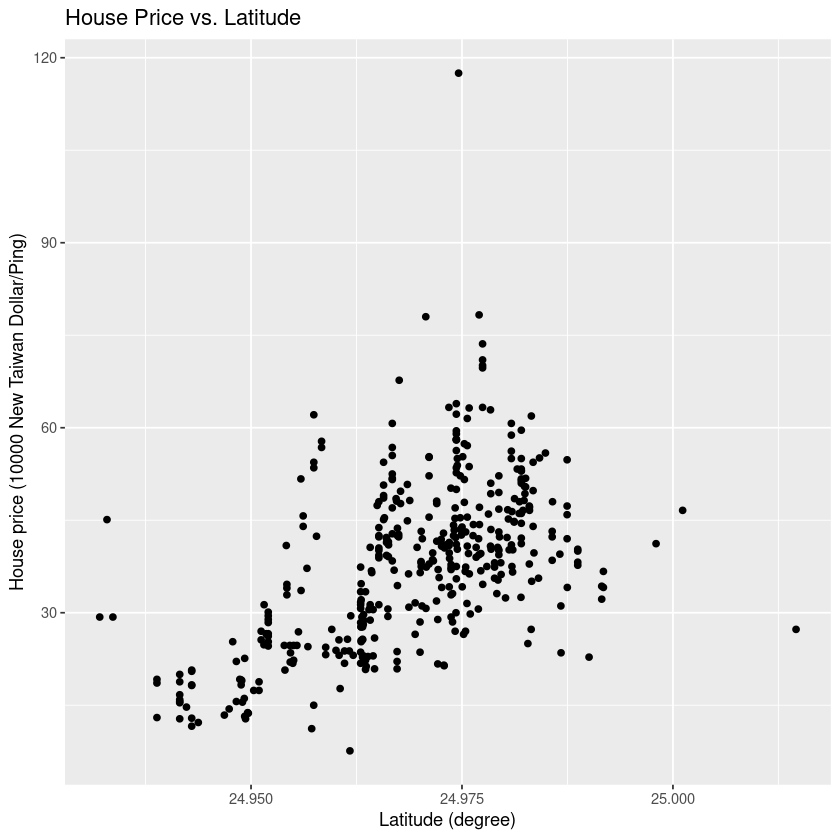

In [12]:
# Visualize the relationship between latitude and house price
ggplot(real_estate, aes(x = lat, y = house_price)) +
    geom_point() +
    labs(x = "Latitude (degree)", y = "House price (10000 New Taiwan Dollar/Ping)") +
    ggtitle("House Price vs. Latitude")

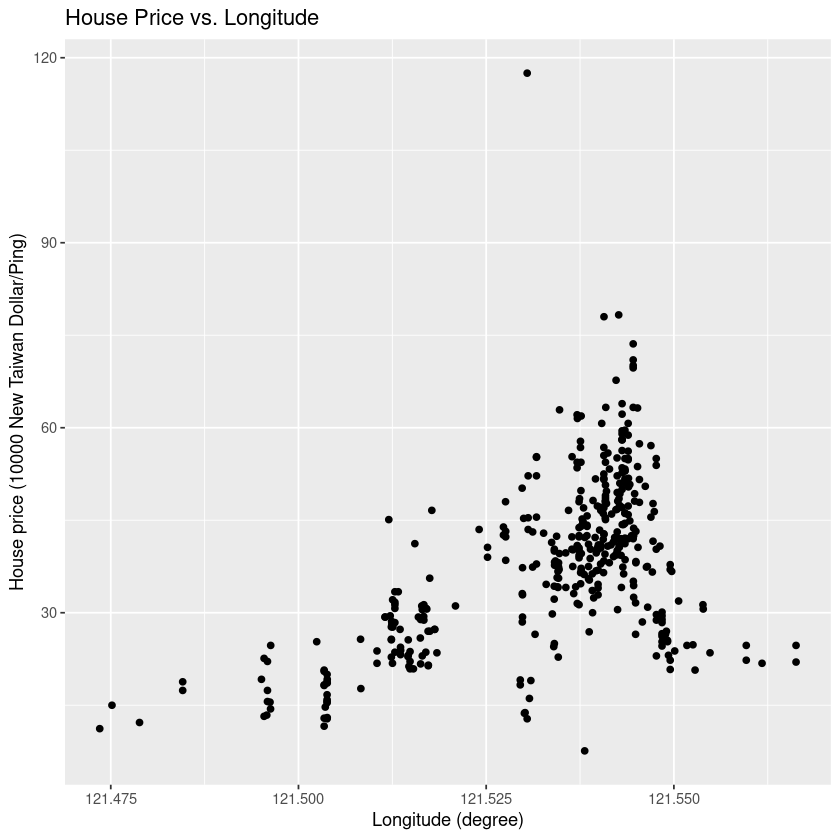

In [13]:
# Visualize the relationship between longitude and house price
ggplot(real_estate, aes(x = lon, y = house_price)) +
    geom_point() +
    labs(x = "Longitude (degree)", y = "House price (10000 New Taiwan Dollar/Ping)") +
    ggtitle("House Price vs. Longitude")

,house_age,nearest_station,num_convenience,lat,lon,house_price
house_age,1.00000000,0.02562205,0.04959251,0.0544199,-0.04852005,-0.2105670
nearest_station,0.02562205,1.00000000,-0.60251914,-0.5910666,-0.80631677,-0.6736129
num_convenience,0.04959251,-0.60251914,1.00000000,0.4441433,0.44909901,0.5710049
lat,0.05441990,-0.59106657,0.44414331,1.0000000,0.41292394,0.5463067
lon,-0.04852005,-0.80631677,0.44909901,0.4129239,1.00000000,0.5232865
house_price,-0.21056705,-0.67361286,0.57100491,0.5463067,0.52328651,1.0000000


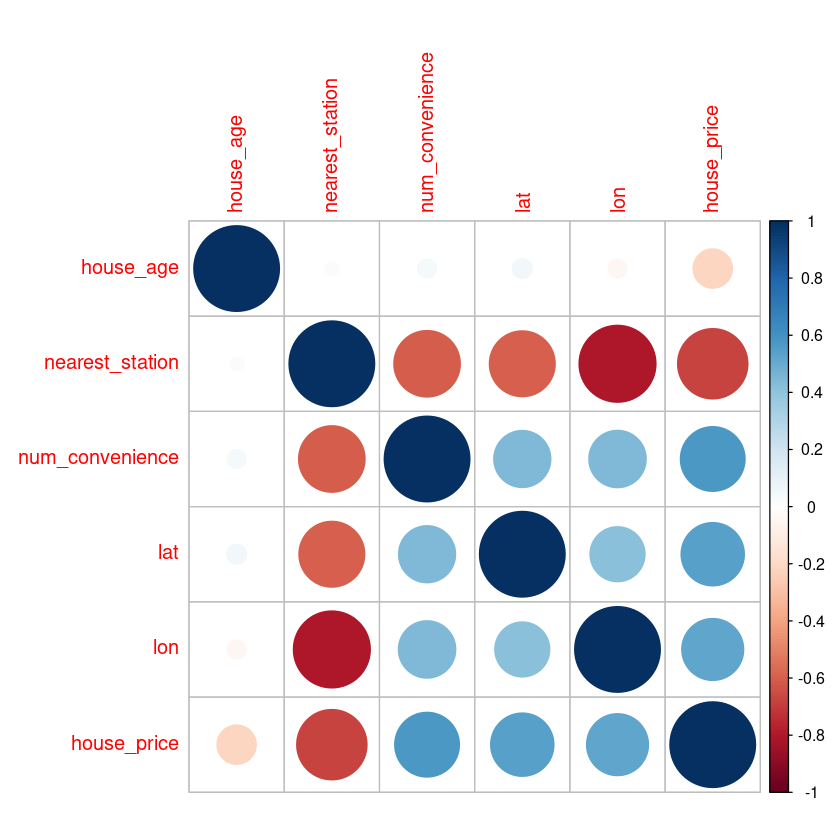

In [18]:
# Correlation matrix
cor_matrix <- cor(real_estate[, c("house_age", "nearest_station", "num_convenience","lat","lon", "house_price")])
cor_matrix
corrplot(cor_matrix)

In [26]:
reg <- lm(house_price ~ house_age + nearest_station + num_convenience + lat + lon, data = real_estate)
sum <- summary(reg)
sum


Call:
lm(formula = house_price ~ house_age + nearest_station + num_convenience + 
    lat + lon, data = real_estate)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.546  -5.267  -1.600   4.247  76.372 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -4.946e+03  6.211e+03  -0.796    0.426    
house_age       -2.689e-01  3.900e-02  -6.896 2.04e-11 ***
nearest_station -4.259e-03  7.233e-04  -5.888 8.17e-09 ***
num_convenience  1.163e+00  1.902e-01   6.114 2.27e-09 ***
lat              2.378e+02  4.495e+01   5.290 2.00e-07 ***
lon             -7.805e+00  4.915e+01  -0.159    0.874    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.965 on 408 degrees of freedom
Multiple R-squared:  0.5712,	Adjusted R-squared:  0.5659 
F-statistic: 108.7 on 5 and 408 DF,  p-value: < 2.2e-16


We will now look at the residuals for the model to find out if we need to use a model other than a linear one

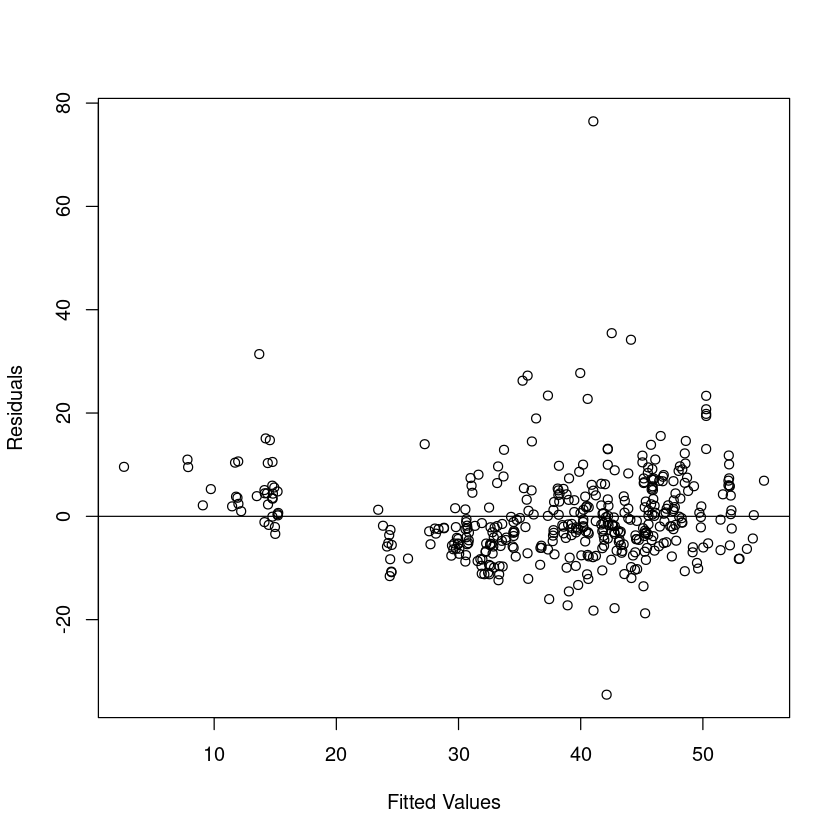

In [25]:
plot(fitted(reg), resid(reg), xlab = "Fitted Values", ylab = "Residuals")
abline(0,0)

There is an interesting gap from 15 to 25 but this is caused by data imbalance. It does appear that there are two groups with two different regressions as fitted values < 20 all mostly lie above 0. Other than this, there is a residual outlier at around `x = 43`.

In [29]:
std.res <- rstandard(reg)
max(std.res)

[1] 8.590836

This variable is a clear outlier that we can remove from the dataset.

In [34]:
real_estate_modified = real_estate[std.res != max(std.res),]
nrow(real_estate)
nrow(real_estate_modified)

[1] 414

[1] 413

In [35]:
reg2 <- lm(house_price ~ house_age + nearest_station + num_convenience + lat + lon, data = real_estate_modified)
sum2 <- summary(reg)
sum2


Call:
lm(formula = house_price ~ house_age + nearest_station + num_convenience + 
    lat + lon, data = real_estate)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.546  -5.267  -1.600   4.247  76.372 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -4.946e+03  6.211e+03  -0.796    0.426    
house_age       -2.689e-01  3.900e-02  -6.896 2.04e-11 ***
nearest_station -4.259e-03  7.233e-04  -5.888 8.17e-09 ***
num_convenience  1.163e+00  1.902e-01   6.114 2.27e-09 ***
lat              2.378e+02  4.495e+01   5.290 2.00e-07 ***
lon             -7.805e+00  4.915e+01  -0.159    0.874    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.965 on 408 degrees of freedom
Multiple R-squared:  0.5712,	Adjusted R-squared:  0.5659 
F-statistic: 108.7 on 5 and 408 DF,  p-value: < 2.2e-16


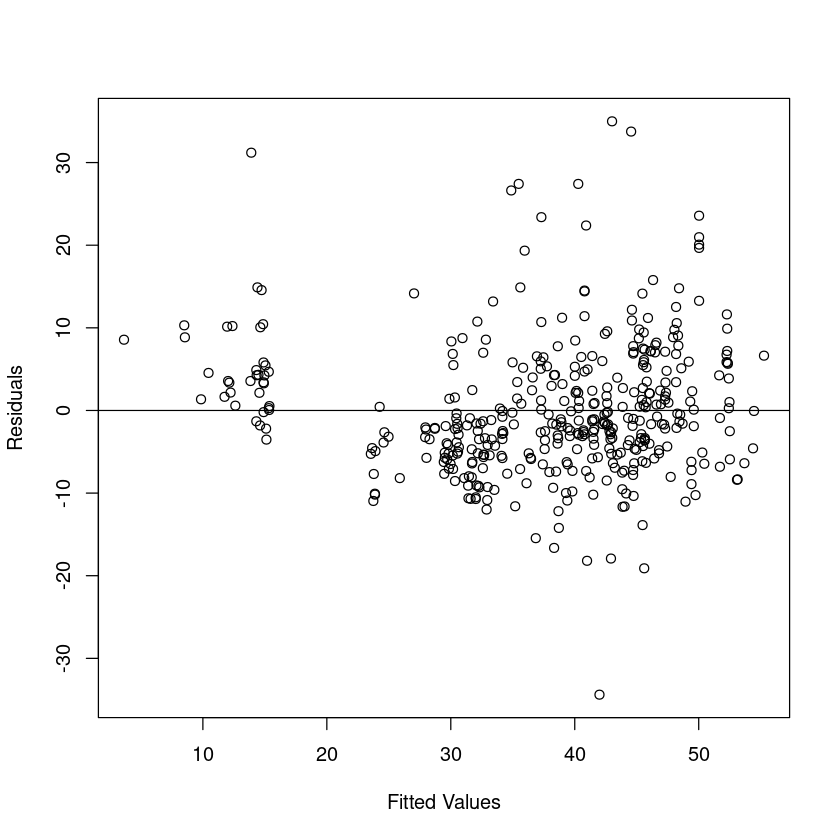

In [36]:
plot(fitted(reg2), resid(reg2), xlab = "Fitted Values", ylab = "Residuals")
abline(0,0)

This makes the two groups clearer, and shows that there could be an application in clustering for this problem.